In [1]:
import pandas as pd
from ast import literal_eval
from itertools import product
from itertools import permutations
import networkx as nx
import numpy as np

In [30]:
pubs_author_funder = pd.read_csv("..//..//..//data//Data//DerivedData//CleanedRawData//pubs_author_funder.csv")
pubs_author_funder['author_country'] = pubs_author_funder['author_country'].apply(literal_eval)
pubs_author_funder['funder_country'] = pubs_author_funder['funder_country'].apply(
    lambda x: literal_eval(x) if pd.notnull(x) else x)

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [32]:
author_df = pubs_author_funder.explode('author_country')

In [35]:
author_df[author_df.author_country=="South Sudan"].id.unique()

array([59907284, 60571875, 60891510, 60898652, 60930208, 60931728,
       61128409, 61318327, 61652899, 61732545, 61777880, 62009140,
       62019743, 62024872, 62110264, 62216711, 62225942, 62947307,
       63176383, 63228524, 63725633, 63881985, 64324867, 64738524,
       52429702, 59067208, 59609662, 59732012, 60090858, 60565405,
       60628445, 60784414, 60865165, 60930213, 60990575, 61686761,
       61691087, 63176540, 63423994, 63487480, 63506755, 63760331,
       64181097, 64399308])

In [3]:
def build_network(colname):
    net_col=pubs_author_funder[['id',colname]]
    net_col=net_col[net_col[colname].notnull()]
    edgelist=[]
    for index, row in net_col.iterrows():
        collist=row[colname]
        collist=list(set(collist))
        for s, t in permutations(collist, 2):
            edgelist.append([s,t,1])
            edgelist.append([t,s,1]) 
    edge_df=pd.DataFrame(edgelist, columns=['source','target','weight'])
    edge_df = edge_df.groupby(['source','target'])['weight'].sum().reset_index()
    net=nx.from_pandas_edgelist(edge_df,'source','target',['weight'])
    return net

In [4]:
fund_net=build_network("funder_country")
coll_net=build_network("author_country")

KeyboardInterrupt: 

In [6]:
coll_net=nx.read_edgelist("collnetwork.txt", delimiter="\t")
fund_net=nx.read_edgelist("fundnetwork.txt", delimiter="\t")

In [50]:
nx.write_edgelist(coll_net,"collnetwork.txt",delime)

In [52]:
def add_attribute(G, attr_file):
    nodeset=list(G.nodes)
    attr_set=attr_file[attr_file.country.isin(nodeset)]
    attr_set=dict(zip(attr_set.country, attr_set.region))
    nx.set_node_attributes(G,attr_set,"region")
    return G

In [23]:
def filter_net(G,namestring):
    for alpha in np.arange(10,31,5)/100:
        g_filtered=extract_backbone(G,alpha)
        g_filtered=add_attribute(g_filtered, cntry_region)
        nx.set_edge_attributes(g_filtered,1,'weight')
        filename='{}_alpha{}.gexf'.format(namestring,alpha)
        nx.write_gexf(g_filtered, filename)

In [17]:
filter_net(coll_net,"CollNet")

In [24]:
filter_net(fund_net,"FundNet")

In [33]:
fund_net.number_of_edges()

4893

In [35]:
nx.degree_pearson_correlation_coefficient(
    fund_net, weight="weight")

-0.1779037625046549

In [23]:
coll_net.degree("United States", weight="weight")

4205986

In [25]:
import matplotlib.pyplot as plt

In [26]:
coll_deg = [coll_net.degree(n,weight='weight') for n in coll_net.nodes()]
fund_deg = [fund_net.degree(n,weight='weight') for n in fund_net.nodes()]

In [27]:
coll_hist, coll_bin = np.histogram(coll_deg, bins=range(min(coll_deg), 
                                                        max(coll_deg) + 5000, 5000))
fund_hist, fund_bin = np.histogram(fund_deg, bins=range(min(fund_deg), 
                                                        max(fund_deg) + 5000, 5000))

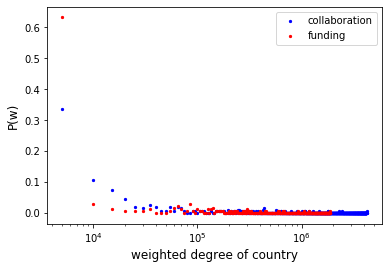

In [29]:
fig, ax=plt.subplots()
ax.scatter(coll_bin[1:], coll_hist/sum(coll_hist),s=5,c="blue",label="collaboration")
ax.scatter(fund_bin[1:], fund_hist/sum(fund_hist),s=5,c="red",label="funding")
plt.xscale("log")
plt.xlabel("weighted degree of country",fontsize=12)
plt.ylabel("P(w)",fontsize=12)
ax.legend()
plt.savefig("degreedistribution.pdf")

In [20]:
import xlrd

In [34]:
region=pd.read_csv("country_metadata.csv",engine="python")
region=region[['country','Region Name']]
region.columns=['country','region']
region.head()

,country,region
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,American-Samoa,Oceania
4,Andorra,Europe


In [29]:
regionlist=region.country.tolist()
colllist=list(coll_net.nodes())
fundlist=list(fund_net.nodes())

In [31]:
set(colllist)-set(regionlist)

{'Burkina Faso',
 'Crimea',
 'Dominica ',
 'Federated States of Micronesia ',
 'Ghana ',
 'Honduras ',
 'Lebanon ',
 'Liberia ',
 'Moldova ',
 'Netherlands-Antilles',
 'North Korea',
 'Republic of Kosovo',
 'Saint-Vincent-et-les-Grenadines',
 'South Sudan',
 'St-Kitts & Nevis ',
 'Taiwan',
 'Trinidad and Tobago',
 'Vatican'}

In [33]:
set(fundlist)-set(regionlist)

{'Burkina Faso',
 'Dominica ',
 'EU',
 'Ghana ',
 'Honduras ',
 'Lebanon ',
 'Liberia ',
 'Moldova ',
 'Republic of Kosovo',
 'South Sudan',
 'St-Kitts & Nevis ',
 'Taiwan',
 'Trinidad and Tobago',
 'Vatican'}

In [36]:
region.to_csv("cntry_region.csv",index=False)

In [4]:
fund_filter=nx.read_gexf("FundNet_alpha0.2.gexf")
coll_filter=nx.read_gexf("CollNet_alpha0.1.gexf")

In [51]:
cntry_region=pd.read_csv("cntry_region.csv")
cntry_region.head()

,country,region
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,American-Samoa,Oceania
4,Andorra,Europe


In [2]:
cntry_cntry_df = pd.read_csv("..//..//..//data//Data//DerivedData//Derived//funding_source_target.csv")
cntry_cntry_df.head()

,source,target,value
0,Afghanistan,Afghanistan,0.500000
1,Afghanistan,Australia,0.333333
2,Afghanistan,Bangladesh,0.666667
3,Afghanistan,Bolivia,0.125000
4,Afghanistan,Canada,1.132576


In [3]:
cntry_cntry_df.columns=['source','target','weight']
cntry_flow_net=nx.from_pandas_edgelist(
    cntry_cntry_df,edge_attr='weight',create_using=nx.DiGraph())

In [4]:
cntry_flow_net.remove_edges_from(nx.selfloop_edges(cntry_flow_net))

In [5]:
def backbone_directed(net, alpha):
    bone = nx.DiGraph()
    for i in net.nodes:
        if len(net[i]) == 0:
            continue
        elif len(net[i]) == 1:
            j = list(net[i])[0]
            if net.in_degree(j) == 1 and i!=j:
                # In the case of a node i with out-degree=1,connected to a node j with in-degree=1, then keep the edge
                bone.add_edge(i, j, weight=net.get_edge_data(i, j)['weight'])
            else:
                # In the case of a node i with out-degree= 1,connected to a node j with in-degree>1,keep the connection only if it beats the threshold for the in-null model of node j
                p_in_ij = net.get_edge_data(i, j)['weight']/net.in_degree(j, weight='weight')
                alpha_ij_in = (1-p_in_ij)**(net.in_degree(j)-1)
                if alpha_ij_in < alpha and i!=j:
                    bone.add_edge(i, j, weight=net.get_edge_data(i, j)['weight'])
        else:
            for j in list(net[i]):
                if net.in_degree(j) == 1:
                    p_out_ij = net.get_edge_data(i, j)['weight']/net.out_degree(i, weight='weight')
                    alpha_ij_out = (1-p_out_ij)**(net.out_degree(i)-1)
                    if alpha_ij_out < alpha and i!=j:
                        bone.add_edge(i, j, weight=net.get_edge_data(i, j)['weight'])
                else:
                    p_in_ij = net.get_edge_data(i, j)['weight'] / net.in_degree(j, weight='weight')
                    alpha_ij_in = (1 - p_in_ij) ** (net.in_degree(j) - 1)
                    p_out_ij = net.get_edge_data(i, j)['weight']/net.out_degree(i, weight='weight')
                    alpha_ij_out = (1-p_out_ij)**(net.out_degree(i)-1)
                    if (alpha_ij_in < alpha or alpha_ij_out < alpha) and  i!=j:
                        bone.add_edge(i, j, weight=net.get_edge_data(i, j)['weight'])
    return bone


In [56]:
def filter_net(G,namestring):
    for alpha in np.arange(0,11,1)/100:
        g_filtered=backbone_directed(G,alpha)
        g_filtered=add_attribute(g_filtered, cntry_region)
        nx.set_edge_attributes(g_filtered,1,'weight')
        filename='{}_alpha{}.gexf'.format(namestring,alpha)
        nx.write_gexf(g_filtered, filename)

In [57]:
filter_net(cntry_flow_net,'cntry_flow_net')